# Predicting House Prices - A case study with SciKit Learn and Pandas

In this section, we will walk through how to build regression models in scikit-learn.

We will load in a the Ames Housing Data, split into train and test sets, and build some models.

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "./data/Ames_Housing_Data.tsv"

In [6]:
df=pd.read_csv(datafile, sep='\t')

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Data Dictionary
A description of the variables can be found here:

https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt



### Data Cleaning
From the above, and reading the documentation, here are a few things to note about this data set:
- SalePrice is our target variable
- The authors recommend removing the few houses that are >4000 SQFT (based on the 'Gr Liv Area' variable)
- Many columns have missing data (based on the number of "non-null" entries in each column
- We have many predictor variables

### Challenge 1: Remove all houses that are greater than 4000 sqft with filtering (‘Gr Liv Area’)

In [9]:
df.shape

(2930, 82)

In [10]:
# Let's remove the large houses as suggested by the authors

df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape

(2925, 82)

- How many data points did we remove from the data set?

In [ ]:
25

## Next, let's restrict ourselves to just a few variables to get started

In [11]:
smaller_df= df[['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars','SalePrice']]

In [12]:
## Let's have a look at these variables

smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.765048,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.759834,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [13]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2924 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [14]:
# There appears to be one NA in Garage Cars - fill with 0
#fill with NA
smaller_df = smaller_df.fillna(0)

In [15]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [40]:
smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


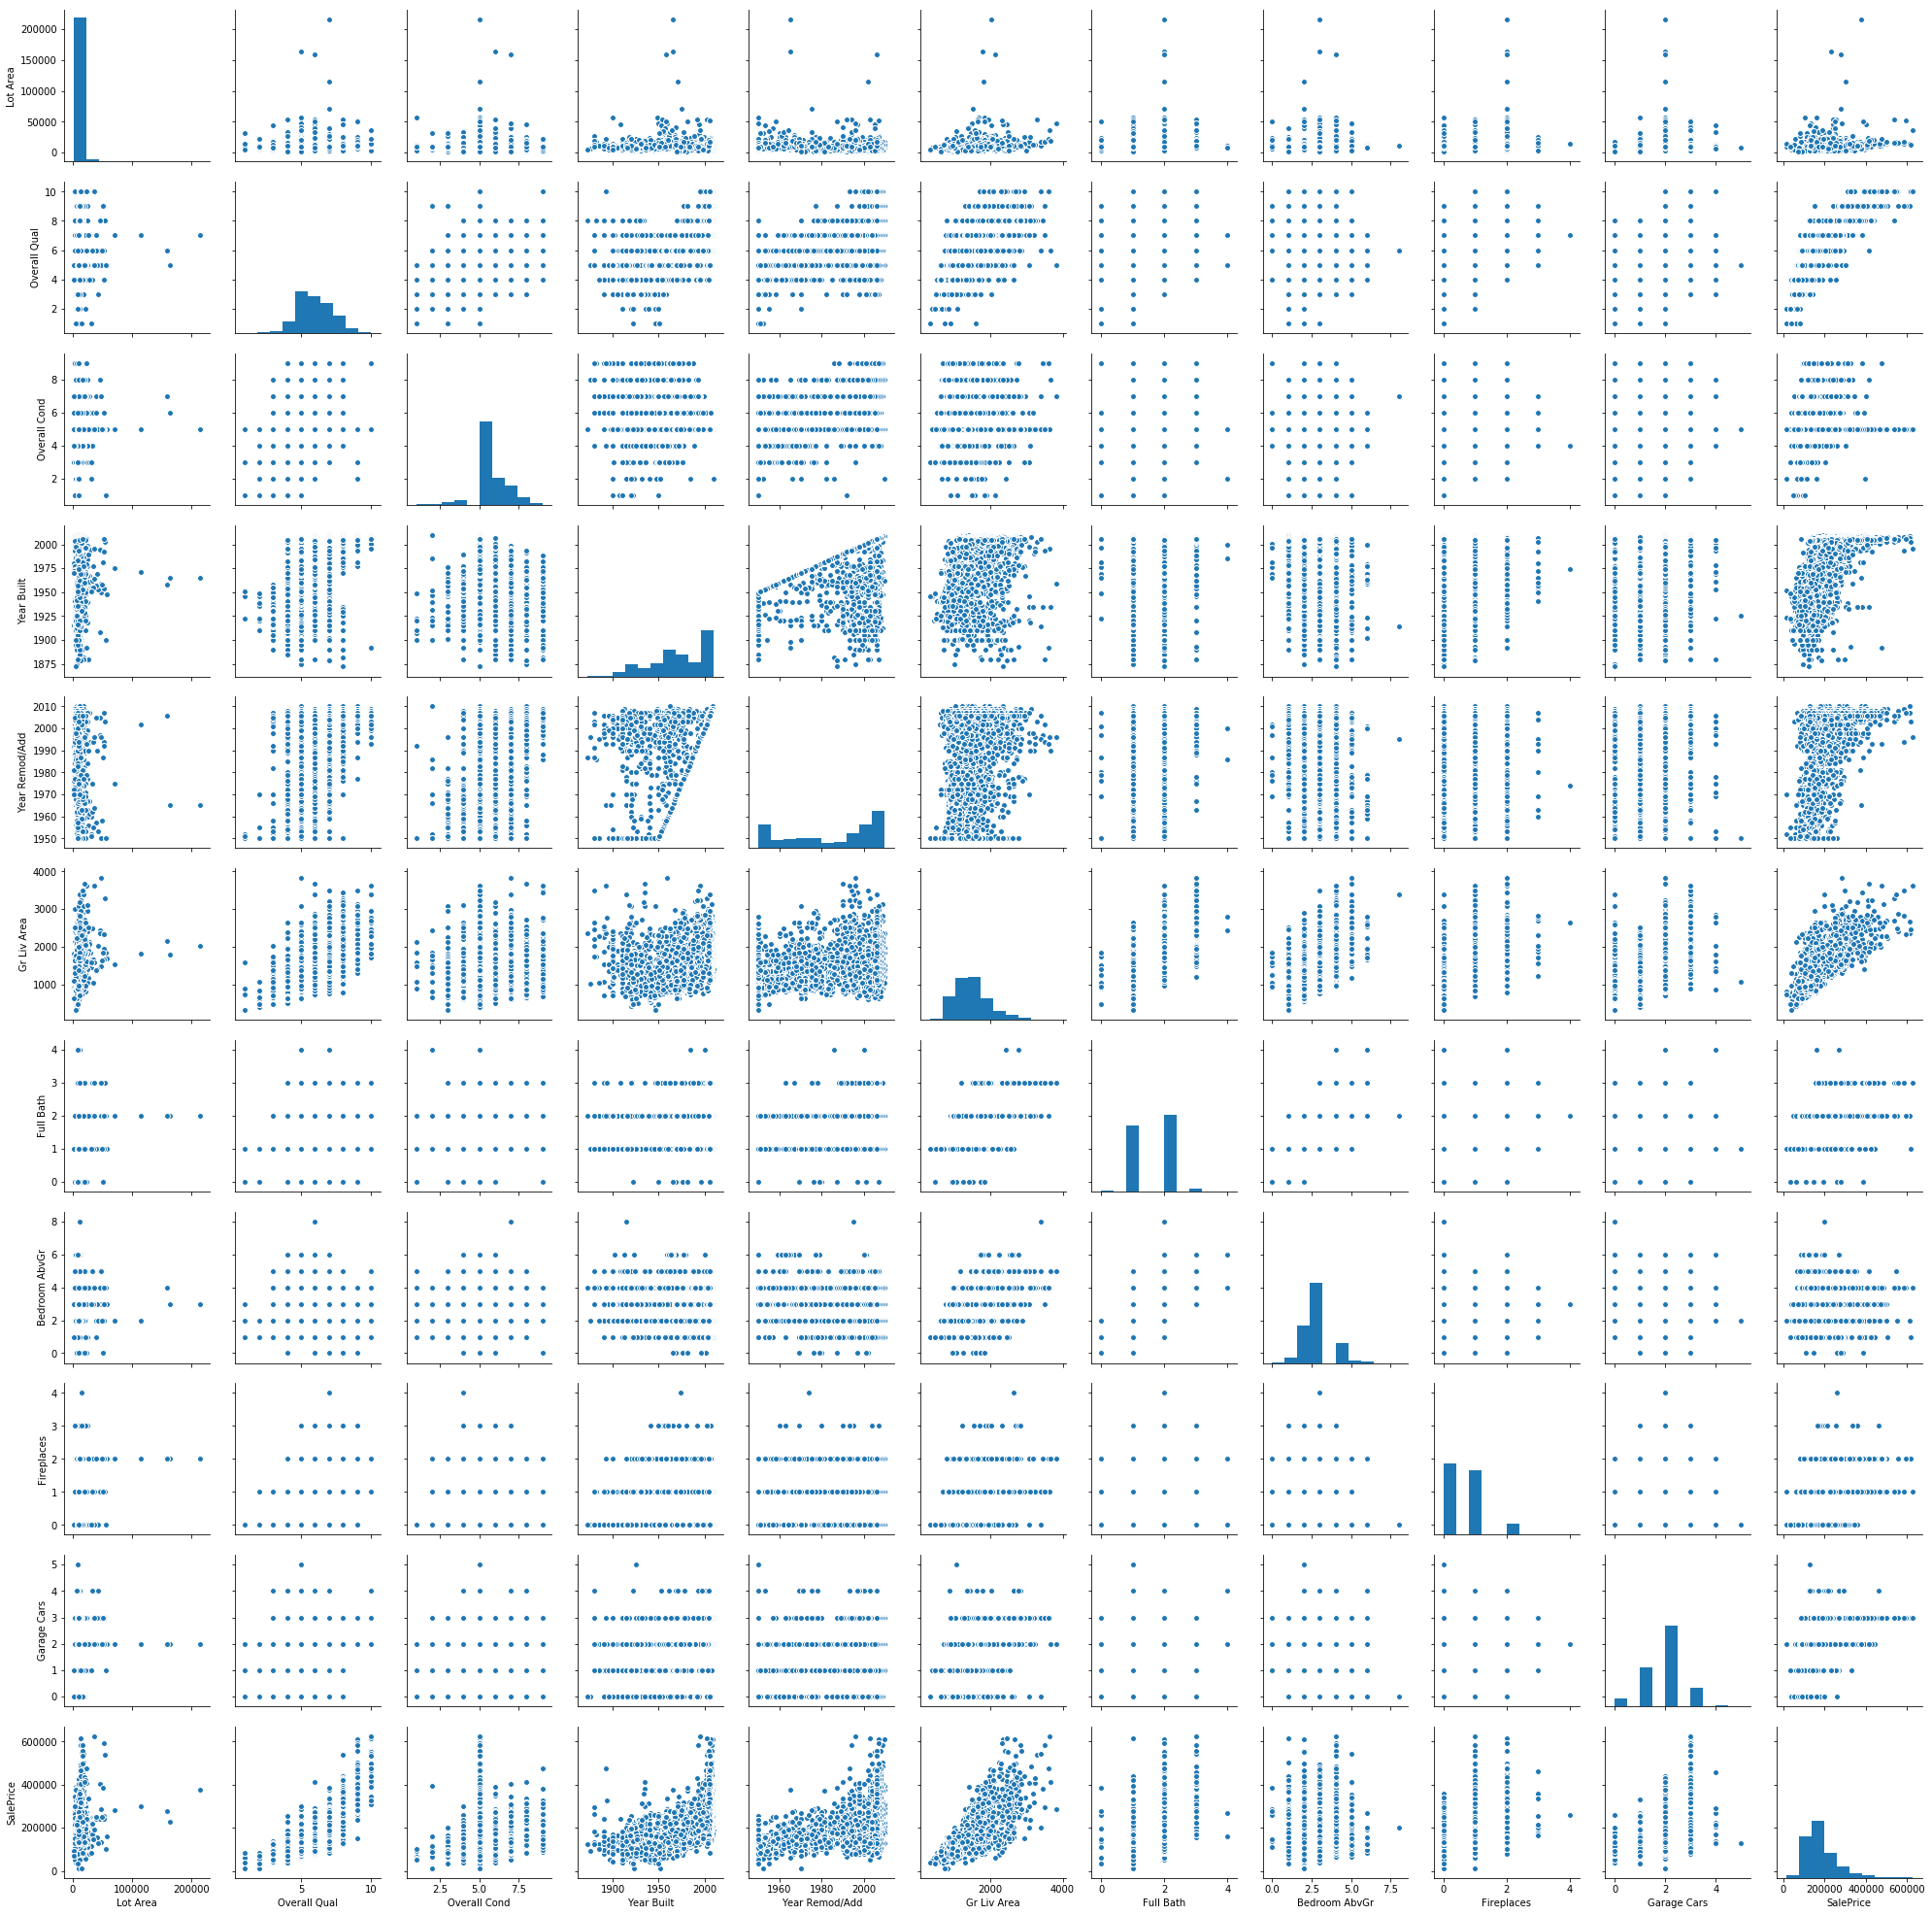

In [16]:
import seaborn as sns
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(smaller_df)

### Comprehension question
From the pairplot above:

- Which variables seem to have the strongest correlations with SalePrice?

In [ ]:
Overall qual, Gr Liv Area

### Train - Test Splits

Train-test splitting is a big part of the data science pipeline. The reason being, we're always trying to build models that perform well "in the wild." This means that in order to evaluate our model's performance, we need to test it on data that we didn't use when building the model. This means we often want to cut out some section of our data before we do any model-building; to save for use as a "evaluator" of how our model performs on data it's never seen before. 

<img src="images/train_test_split.png">

In SkLearn, we use `train_test_split` to do this, which allows us to randomly sample the data instead of taking one big chunk. 

In [18]:
from sklearn.model_selection import train_test_split

In [24]:
#Split the data 70-30 train/test
X = smaller_df.drop(['SalePrice'], axis=1)
y = smaller_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#train_test_split does a random split not in order

In [25]:
X_train.shape, X_test.shape

((2047, 10), (878, 10))

In [26]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

## Linear Regression
In the first part of this notebook we will use linear regression.  We will start with a simple one-variable linear regression and then proceed to more complicated models.

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# First let us fit only on Living Area (sqft)
selected_columns_1 = ['Gr Liv Area']

### Sklearn Modeling
The package scikit-learn has a particular structure to their predictive modeling functionality.  Typically, a model is "defined" then it is "fit" (to a set of examples with their answers).  Then the trained model can be used to predict on a set of (unlabeled) data points.  We will walk through this process in the next few cells.

In [29]:
## First we define a `default` LinearRegression model and fit it to the data (with just `Gr Liv Area' as a predictor
## and SalePrice as the targer.)

lr_model1 = LinearRegression()
lr_model1.fit(X_train[selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.coef_, lr_model1.intercept_

(array([112.05335187]), 12169.835728455451)

In [37]:
#note - Don't calculate R Squared on trained data 
lr_model1.score(X_train[selected_columns_1], y_train)

0.5121902487570431

### Comprehension Question
- What would this simple model predict as the sales price of a 1000 sq ft home?
- Does that seem reasonable? (Remember, these are house prices in Ames, Iowa between 2006 and 2010)
- Write a function that takes the variables above and predicts the output

In [41]:
new_x = np.array([1000]).reshape(-1,1)
#-1 infers what the other dimension should look like. X, Y array
predicted_y = lr_model1.predict(new_x) # Predict for new data!
print(predicted_y)

[124223.18760305]


## Plotting the Regression Line
Let's use our knowledge of Matplotlib/Seaborn to make some plots of this data. Let's begin by plotting Price vs Square Footage. Let's also add a line for our model.

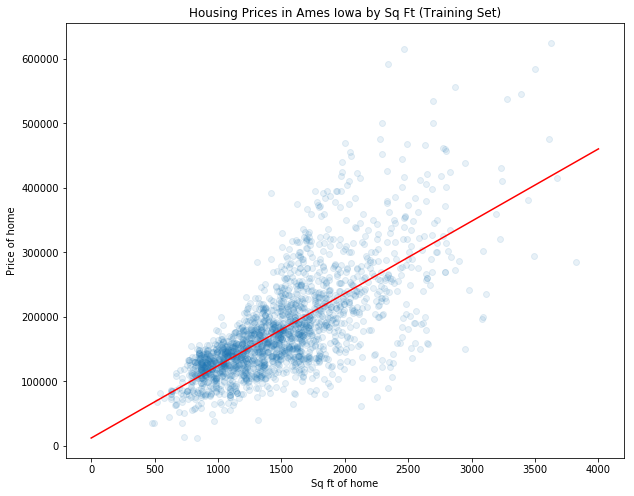

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
#red line uses linear regression model inputs
plt.title("Housing Prices in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

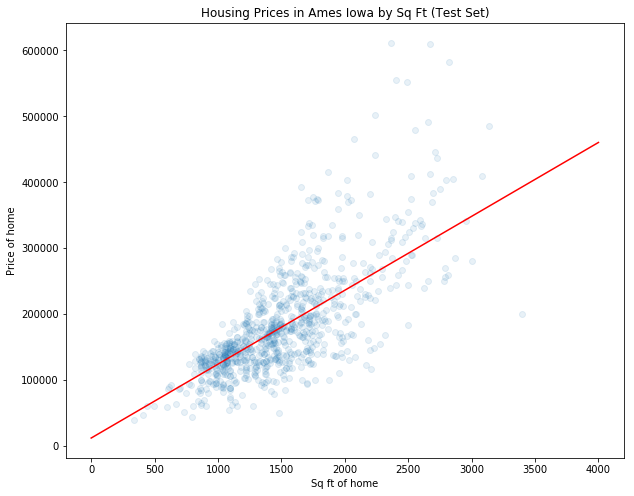

In [48]:
# Let's make a similar plot for the test set

plt.figure(figsize=(10,8))
plt.scatter(X_test['Gr Liv Area'],y_test,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Test Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

In [56]:
# Let's get predictions of the model on the test set
# Note the use of the `model.predict(feature_matrix)` syntax

test_set_pred1 = lr_model1.predict(X_test[selected_columns_1])

A very useful plot for diagnosing problems is to plot the actual price vs the predicted price. If our model was perfect, every point would be on a perfect 45-degree line starting from (0,0) and extending up with a slope 1. Let's see how we did here.

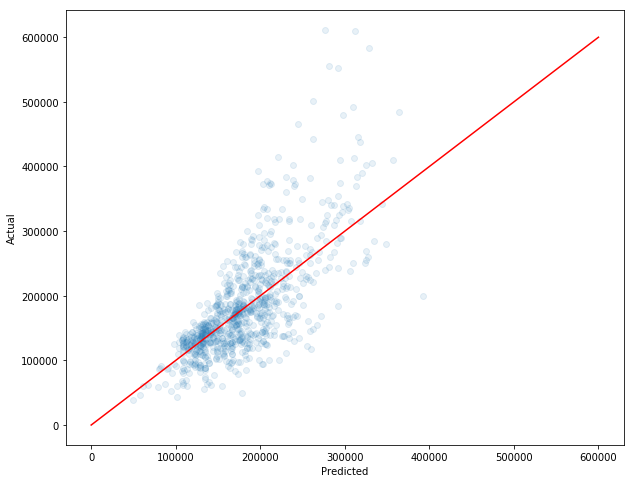

In [57]:
## Let's plot the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000), 'r-')
plt.xlabel("Predicted")
plt.ylabel("Actual");

Let's talk about some metrics and what they're used for.

In [58]:
# How good is our model on the test set?

# Mean Squared Error
def mean_square_error(true, pred):
    return np.mean((pred - true)**2)
#** = to the power of

mean_square_error(y_test,test_set_pred1)

3068818167.7470694

In [59]:
# Root Mean Square Error
def root_mean_square_error(true,pred):
    return np.sqrt(mean_square_error(true,pred))

root_mean_square_error(y_test,test_set_pred1)

55396.91478545596

In [60]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))

mean_absolute_deviation(y_test, test_set_pred1)

38254.52256793792

In [61]:
# R^2

def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST

R2_score(y_test, test_set_pred1)

0.5262924382126675

Let's put all of those into one nice function that prints out all of our stats:

In [62]:
def model_stats(true, pred):
    print("MSE:", mean_square_error(true, pred))
    print("MAE:", mean_absolute_deviation(true, pred))
    print("RMSE: ", root_mean_square_error(true,pred))
    print("R2: ", R2_score(true,pred))
model_stats(y_test, test_set_pred1)

MSE: 3068818167.7470694
MAE: 38254.52256793792
RMSE:  55396.91478545596
R2:  0.5262924382126675


That was all well-and-good, but we left a lot of information out when we switched to just the square footage. So let's add some information back in by allowing the "Lot Size" to inform our decisions as well the quality of the home.

In [64]:
#multivariable regression!!!
selected_columns_2 = ['Lot Area', 'Overall Qual']

In [66]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train[selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lr_model2.coef_

array([2.34673289e+00, 4.36425728e+04])

In [69]:
lr_model2.intercept_

-109333.4664501746

In [68]:
## This is a hack to show the variables next to their values
list(zip(selected_columns_2,lr_model2.coef_))
#zip takes two lists and starts pairing them up in tuples

[('Lot Area', 2.3467328888649526), ('Overall Qual', 43642.572792710474)]

In [70]:
test_set_pred2 = lr_model2.predict(X_test[selected_columns_2])

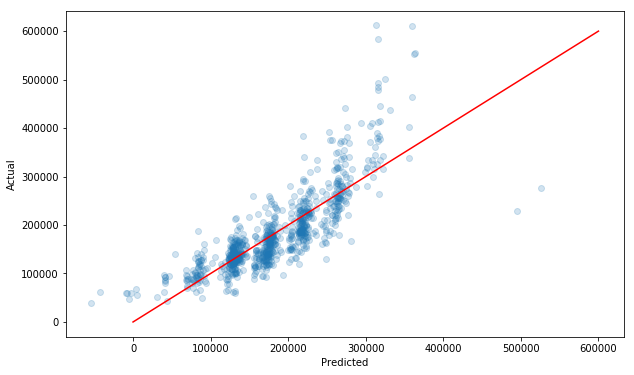

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred2,y_test,alpha=.2)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000),'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [72]:
model_stats(y_test,test_set_pred2)

MSE: 2100705505.1592097
MAE: 31406.10648493379
RMSE:  45833.4539955174
R2:  0.6757318197145743


Excellent! That's an improvement. You can see that our errors went down and our R2 went up. That's lovely. 

### Challenge 2: Add the Lot area information into your process for prediction

In [73]:
#multivariable regression!!!
selected_columns_3 = ['Lot Area', 'Overall Qual', 'Gr Liv Area']

### Feature Engineering
Since there seems to be some non-linearity, let's make a new variable that is "Greater Living Area"^2. This is called feature engineering since we're "engineering (or making)" a new feature out of our old features.

In [74]:
X['GLA2'] = X['Gr Liv Area']**2
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'GLA2'],
      dtype='object')

In [75]:
## We need to recreate the train and test sets -- make sure you use the same random seed!
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [76]:
selected_columns_3 = ['Lot Area', 'Overall Qual', 'GLA2']

In [77]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train[selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
list(zip(X_train[selected_columns_3].columns,lr_model3.coef_))

[('Lot Area', 1.506923214787761),
 ('Overall Qual', 34124.60249032446),
 ('GLA2', 0.015477567877382548)]

In [79]:
test_set_pred3 = lr_model3.predict(X_test[selected_columns_3])

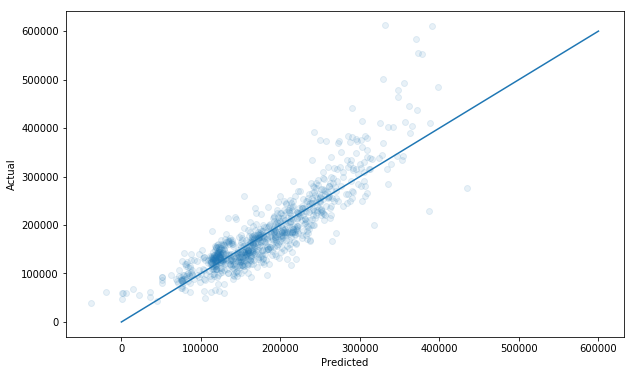

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [81]:
model_stats(y_test,test_set_pred3)

MSE: 1456872146.1799314
MAE: 26600.794844494518
RMSE:  38168.99456600778
R2:  0.7751149418183274


## Exercise

We're now going to split into groups. Each group should attempt to build the best model they can using the techniques shown above. Some recommendations:

* Add some of the features we removed. But be careful, we haven't talked about how to handle categorical data, so your model won't work with categories.
* Do some feature engineering. We played with GLA^2, but there are more variables you can try things with. You might also try multiplying some features together to see if there are "interaction" terms.
* We've looked at the SkLearn Documentation, so you might also consider trying some different Regression Models - like RandomForestRegressor. Be careful though, you can't just plug-and-play some of the models into the exact same code. They don't all have coefficients for instance...

Go wild. After we finish up, each group will have a chance to describe what sort of work they tried and how their model performed!

In [83]:
smaller_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900


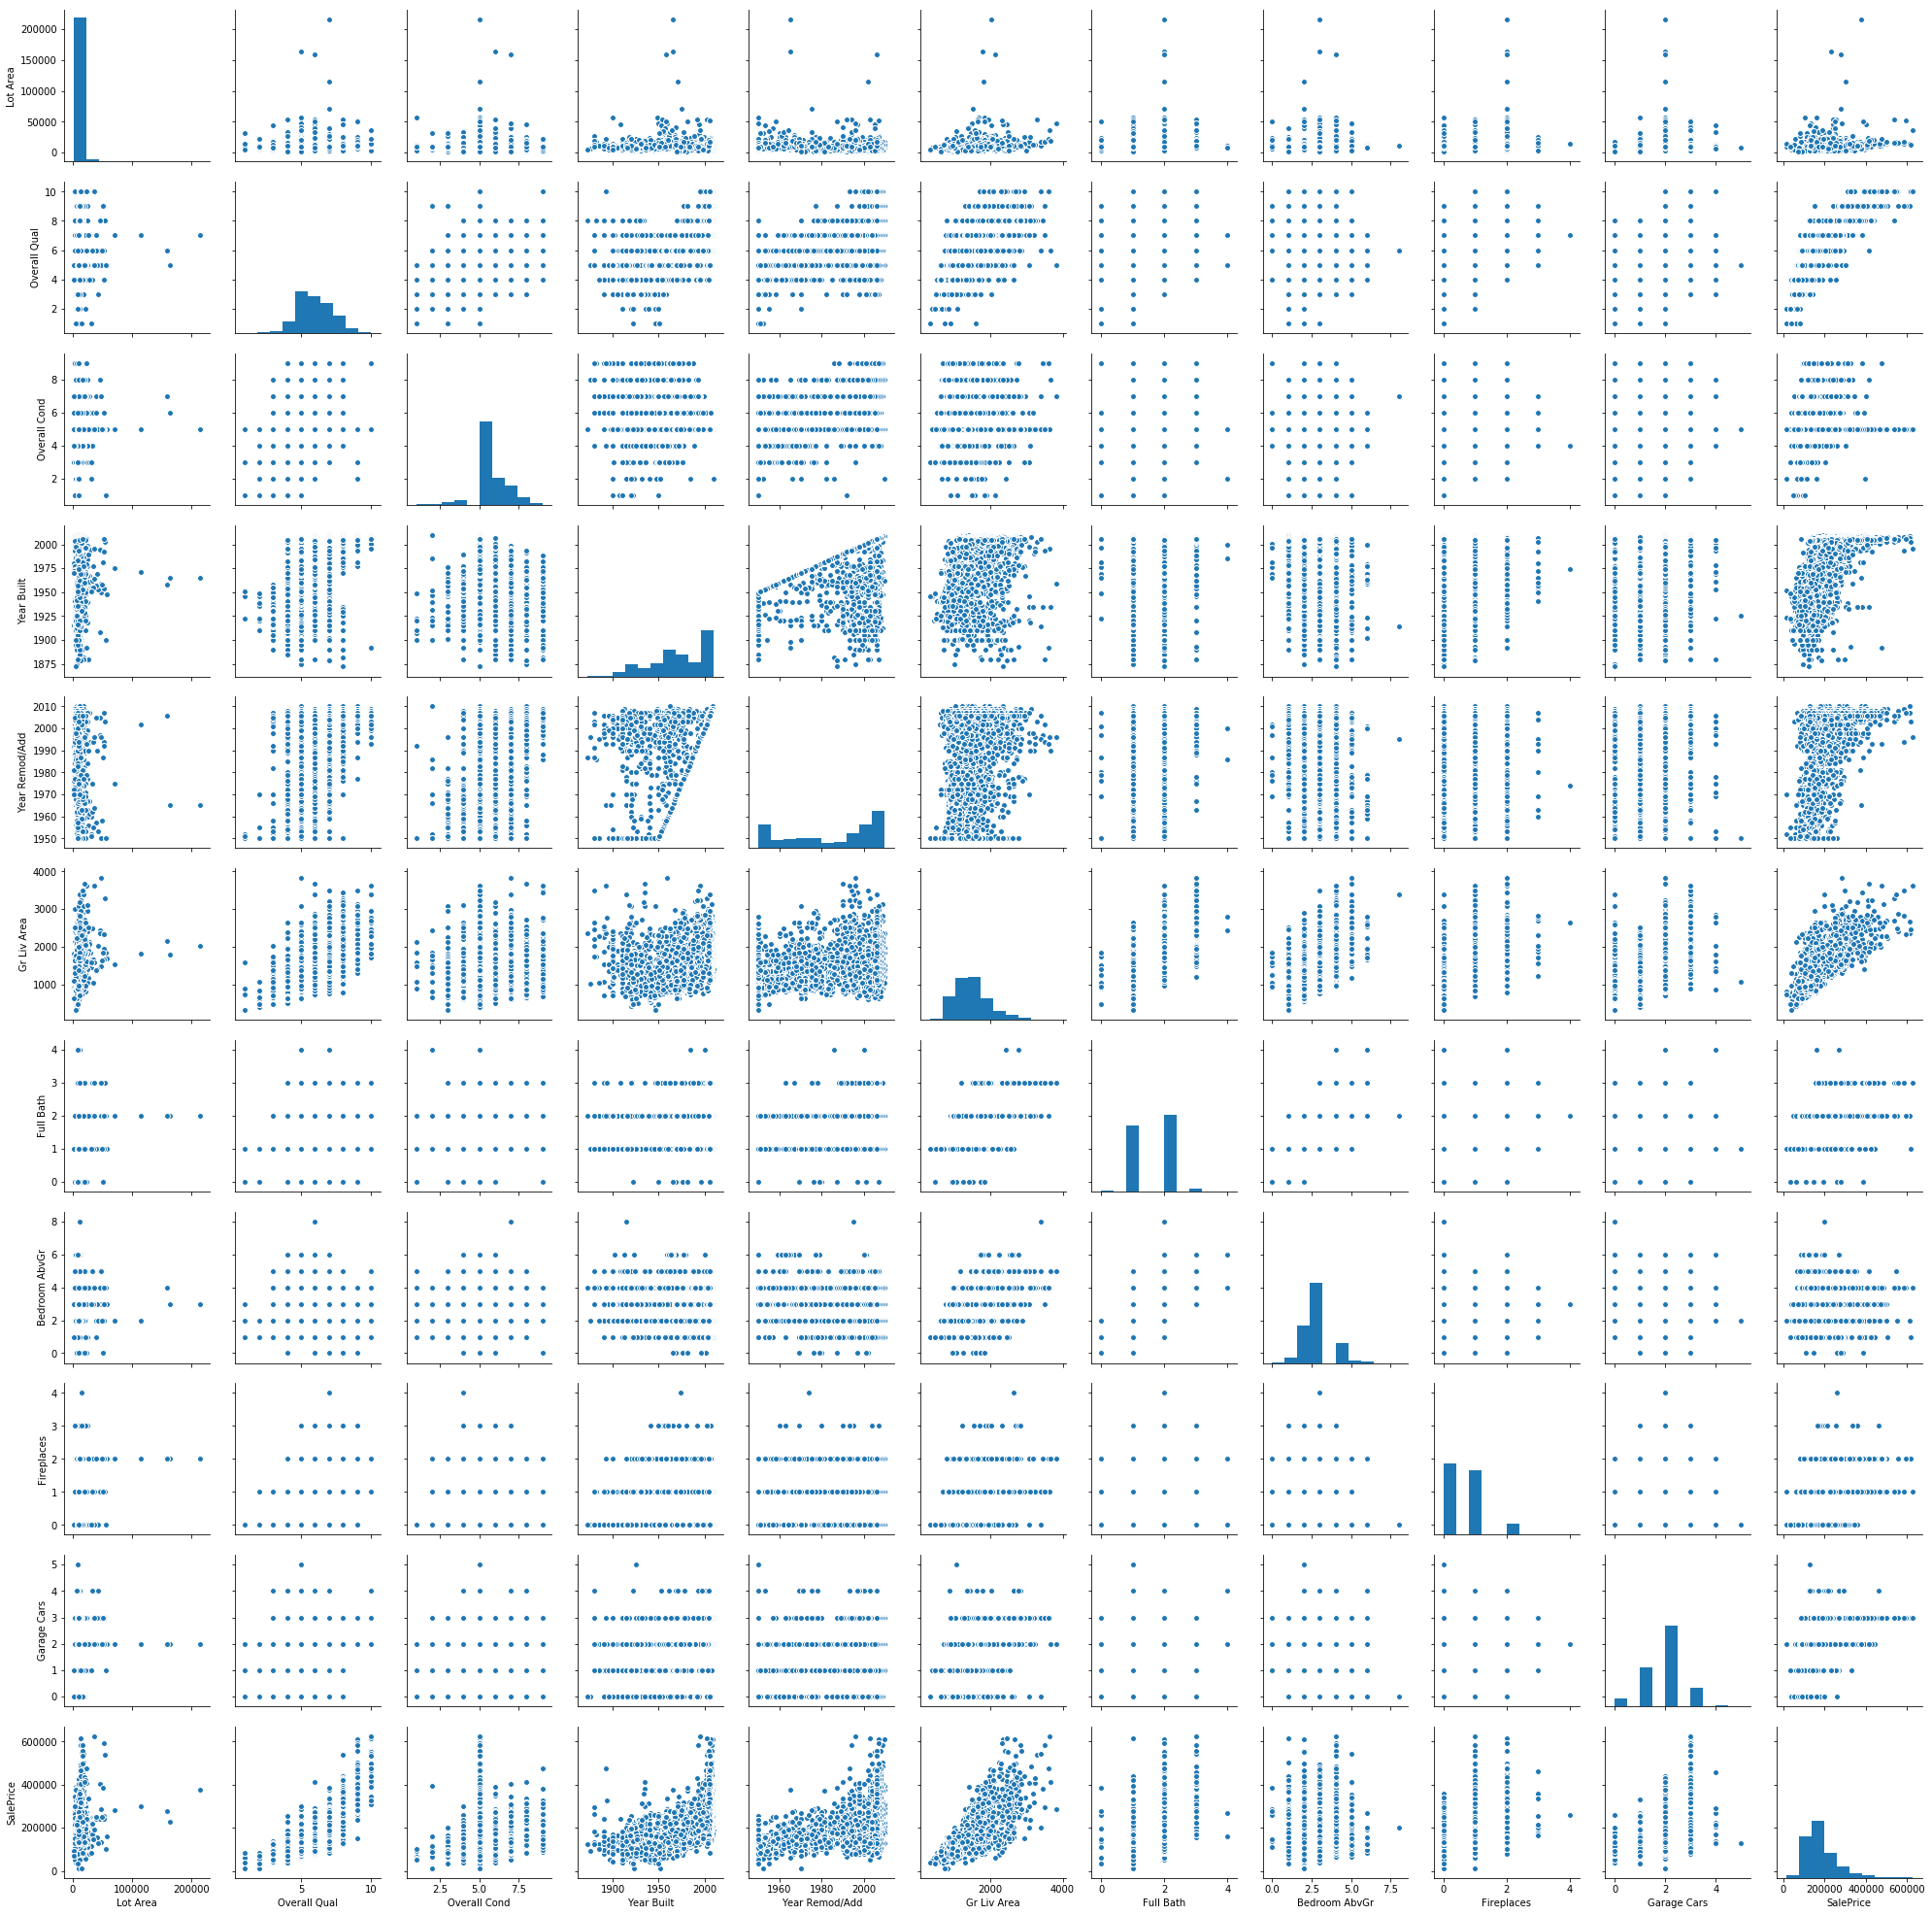

In [84]:
sns.pairplot(smaller_df)

In [97]:
smaller_df['GLA2'] = smaller_df['Gr Liv Area']**2
smaller_df['YB2'] = smaller_df['Year Built']**2
smaller_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice,GLA2,YB2
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000,2742336,3841600
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000,802816,3845521
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000,1766241,3833764
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000,4452100,3873024
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900,2653641,3988009


In [103]:
selected_columns4 = ['Overall Qual', 'GLA2', 'YB2', 'Garage Cars']


In [104]:
## We need to recreate the train and test sets -- make sure you use the same random seed!
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [100]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train[selected_columns4],y_train)

KeyError: "['YB2'] not in index"

## Random Forest
Next we will explore how to use Random Forests for Regression.  Random Forest are great "off the shelf" since they make few assumptions about the nature of the relationship between the predictors and the target, and can capture higher order interactions without explicity including them.

In [101]:
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'GLA2'],
      dtype='object')

In [102]:
## Remove any variables that were created
## Random Forest gets no extra value from (var^2)
X.drop('OQ2',axis=1,inplace=True)
X.drop('GLA2',axis=1,inplace=True)

KeyError: "labels ['OQ2'] not contained in axis"

In [ ]:
X.columns

In [ ]:
## Recreate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
X_train[X_train.isnull().any(axis=1)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model1.fit(X_train, y_train)

In [ ]:
rf1_test_pred = rf_model1.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(rf1_test_pred,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000),'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [ ]:
#RMSE
root_mean_square_error(y_test, rf1_test_pred)

In [ ]:
#MAD
mean_absolute_deviation(y_test, rf1_test_pred)

In [ ]:
## R-squared
R2_score(y_test,rf1_test_pred)

In [ ]:
list(zip(X.columns,rf_model1.feature_importances_))

In [ ]:
num_categories = len(X.columns)
plt.figure(figsize=(10,6))
plt.barh(range(num_categories),
         rf_model1.feature_importances_,
         edgecolor='none',
         height=0.6,
         align='center')
plt.yticks(range(num_categories),
           X.columns);